In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train_trans = pd.read_csv(
    r"C:\Users\Lenovoideapad\Desktop\ML\DATA\train_transaction.csv"
)
train_id = pd.read_csv(
    r"C:\Users\Lenovoideapad\Desktop\ML\DATA\train_identity.csv"
)

df = train_trans.merge(train_id, on="TransactionID", how="left")

In [8]:
df.shape

(590540, 434)

In [9]:
df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [10]:
df['isFraud'].value_counts()
df['isFraud'].value_counts(normalize=True) * 100


isFraud
0    96.500999
1     3.499001
Name: proportion, dtype: float64

In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 434 entries, TransactionID to DeviceInfo
dtypes: float64(399), int64(4), object(31)
memory usage: 1.9+ GB


In [12]:
missing = df.isnull().mean().sort_values(ascending=False)
missing.head(20)


id_24    0.991962
id_25    0.991310
id_07    0.991271
id_08    0.991271
id_21    0.991264
id_26    0.991257
id_27    0.991247
id_23    0.991247
id_22    0.991247
dist2    0.936284
D7       0.934099
id_18    0.923607
D13      0.895093
D14      0.894695
D12      0.890410
id_04    0.887689
id_03    0.887689
D6       0.876068
id_33    0.875895
id_09    0.873123
dtype: float64

In [19]:
drop_cols = missing[missing > 0.9].index
df_reduced = df.drop(columns=drop_cols)
df_reduced.shape


(590540, 422)

In [14]:
num_cols = df_reduced.select_dtypes(include='number').columns

df_reduced[num_cols].describe().T


,count,mean,std,min,25%,50%,75%,max
TransactionID,590540.0,3.282270e+06,1.704744e+05,2987000.000,3134634.750,3282269.500,3429904.25,3.577539e+06
isFraud,590540.0,3.499001e-02,1.837546e-01,0.000,0.000,0.000,0.00,1.000000e+00
TransactionDT,590540.0,7.372311e+06,4.617224e+06,86400.000,3027057.750,7306527.500,11246620.00,1.581113e+07
TransactionAmt,590540.0,1.350272e+02,2.391625e+02,0.251,43.321,68.769,125.00,3.193739e+04
card1,590540.0,9.898735e+03,4.901170e+03,1000.000,6019.000,9678.000,14184.00,1.839600e+04
...,...,...,...,...,...,...,...,...
id_14,80044.0,-3.445071e+02,9.369550e+01,-660.000,-360.000,-300.000,-300.00,7.200000e+02
id_17,139369.0,1.894514e+02,3.037536e+01,100.000,166.000,166.000,225.00,2.290000e+02
id_19,139318.0,3.531282e+02,1.410953e+02,100.000,266.000,341.000,427.00,6.710000e+02
id_20,139261.0,4.038827e+02,1.521603e+02,100.000,256.000,472.000,533.00,6.610000e+02


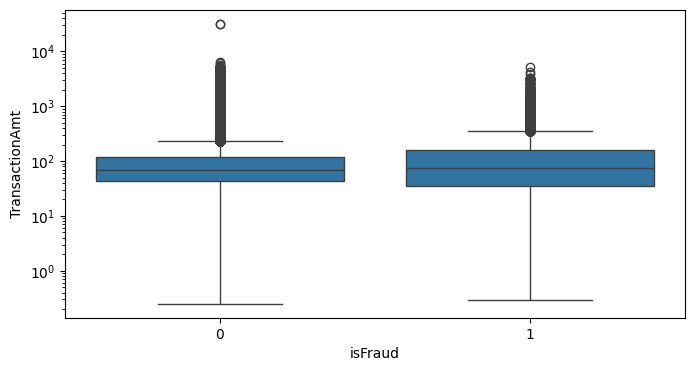

In [15]:
plt.figure(figsize=(8,4))
sns.boxplot(x='isFraud', y='TransactionAmt', data=df_reduced)
plt.yscale('log')
plt.show()


In [16]:
cat_cols = df_reduced.select_dtypes(include='object').columns
cat_cols


Index(['ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M1',
       'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'id_12', 'id_15',
       'id_16', 'id_28', 'id_29', 'id_30', 'id_31', 'id_33', 'id_34', 'id_35',
       'id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo'],
      dtype='object')

In [17]:
df_reduced.groupby('ProductCD')['isFraud'].mean()


ProductCD
C    0.116873
H    0.047662
R    0.037826
S    0.058996
W    0.020399
Name: isFraud, dtype: float64

In [18]:
df_reduced['TransactionDT'].describe()


count    5.905400e+05
mean     7.372311e+06
std      4.617224e+06
min      8.640000e+04
25%      3.027058e+06
50%      7.306528e+06
75%      1.124662e+07
max      1.581113e+07
Name: TransactionDT, dtype: float64